In this example, we show how to compute $e_{\text{gw}}$ from an eccentric waveform generated using the `TEOBResumS-DALI` waveform model. <br>
We will use the `Dali` branch of `TEOBResumS` from [here](https://bitbucket.org/teobresums/teobresums/src/Dali/). <br>
The waveform loading function used in this notebook is based on the python example provided inside the above branch [here](https://bitbucket.org/teobresums/teobresums/src/Dali/Python/Examples/ExampleEccentricBBH.py). See the installation instructions [here](https://bitbucket.org/teobresums/teobresums/src/Dali/Python/).

In [1]:
import EOBRun_module # generate TEOBResumS modes
import numpy as np
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings

/home/arif/gw_eccentricity/gw_eccentricity/load_data.py:6: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
# create a dictionary of waveform parameters
parameters = {
        # System parametes, assuming aligned spins        
        'M'                  : 50,     # Total mass
        'q'                  : 2,      # Mass ratio m1/m2 > 1
        'chi1z'              : 0.3,    # Z component of chi_1
        'chi2z'              : -0.6,   # Z component of chi_2
        'ecc'                : 0.1,    # Eccentricity.
        'anomaly'            : np.pi,  # mean anomaly
        # Initial conditions and output time grid
        'domain'             : 0,      # Time domain.
        'srate_interp'       : 2048,   # srate at which to interpolate. Default = 4096.
        'use_geometric_units': "yes",  # output quantities in geometric units.
        'initial_frequency'  : 0.005,   # in Hz if use_geometric_units = "no", else in geometric units
        'interp_uniform_grid': "yes",  # interpolate mode by mode on a uniform grid.

        # Modes
        'use_mode_lm'        : [1],    # List of modes to use/output through EOBRunPy, 1 for only (2, 2) mode

        # Output parameters (Python)
        'arg_out'            : "yes",  # Output hlm/hflm.
    }

In [3]:
def get_dataDict(pars):
    t, _, _, hlm, _ = EOBRun_module.EOBRunPy(pars)
    return {"t": t,
            "amplm": {(2, 2): hlm["1"][0]},
            "phaselm": {(2, 2): hlm["1"][1]}}

In [4]:
dataDict = get_dataDict(parameters)

In [5]:
gwecc_dict = measure_eccentricity(
    dataDict=dataDict,
    tref_in=dataDict["t"])

In [6]:
gwecc_obj = gwecc_dict["gwecc_object"]

(<Figure size 1200x400 with 1 Axes>,
 <Axes: xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

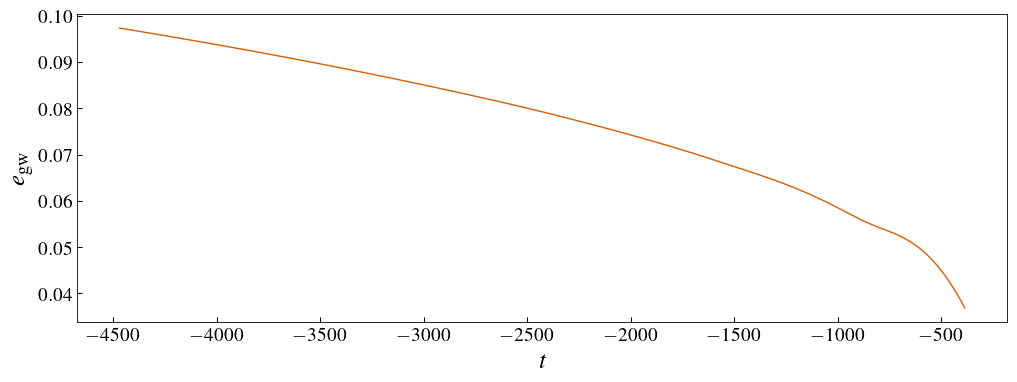

In [7]:
use_fancy_plotsettings()
gwecc_obj.plot_eccentricity()